#Full Code Implementation (with Arrival Times)


Enter the number of processes: 4
Use arrival times? (yes/no): yes
Enter Arrival Time for P1: 0
Enter Burst Time for P1: 1
Enter Arrival Time for P2: 1
Enter Burst Time for P2: 4
Enter Arrival Time for P3: 2
Enter Burst Time for P3: 7
Enter Arrival Time for P4: 3
Enter Burst Time for P4: 5

Process Table:
Process   Arrival Time   Burst Time     Waiting Time   Turnaround Time
P1        0              1              0              1              
P2        1              4              0              4              
P4        3              5              2              7              
P3        2              7              8              15             

Average Waiting Time: 2.50
Average Turnaround Time: 6.75


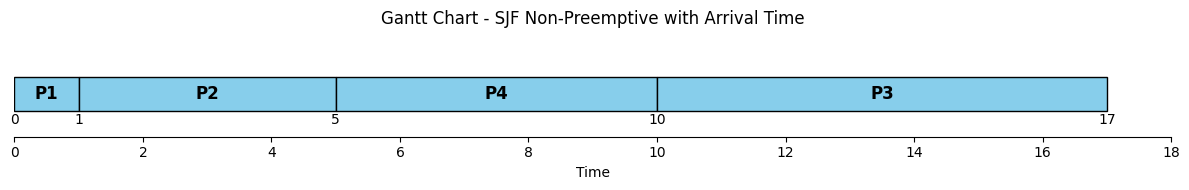

In [27]:
import matplotlib.pyplot as plt

# ------------------------------------------------------- SJF Function ---------------------------------------------------------
def sjf_non_preemptive_with_arrival(processes):
    # ترتيب العمليات حسب وقت الوصول فقط في البداية
    original_processes = processes.copy()  # الاحتفاظ بالترتيب الأصلي للعرض لاحقًا
    processes.sort(key=lambda x: x[1]) # ترتيب العمليات حسب وقت الوصول
    n = len(processes)
    waiting_time = [0] * n        #Waiting_time = [0,0,0,0]
    turnaround_time = [0] * n     #Turnaround_time = [0,0,0,0]
    gantt_chart = []
    current_time = 0
    completed = 0
    ready_queue = []
    process_index = 0
    final_order = []  # قائمة لترتيب العمليات النهائي

    # معالجة كل عملية بناءً على وقت الوصول ووقت التنفيذ
    while completed < n:
        # إضافة العمليات التي وصلت إلى قائمة الانتظار
        while process_index < n and processes[process_index][1] <= current_time:
            ready_queue.append(processes[process_index])
            process_index += 1


        # إذا كانت قائمة الانتظار فارغة، تقدم الزمن إلى أقرب عملية قادمة
        if not ready_queue:
            current_time = processes[process_index][1]
            continue


        # اختيار أقصر عملية في قائمة الانتظار
        ready_queue.sort(key=lambda x: x[2])      # Sort processes in the ready queue based on Shortest Burst time
        current_process = ready_queue.pop(0)      # pop the first process (previously sorted) from the ready Qeueue to start executing
        name, arrival, burst = current_process    # Split (current_process) Into three Variables (name, arrival, burst).


        # حساب الأوقات
        start_time = current_time
        end_time = current_time + burst
        waiting_time[completed] = start_time - arrival
        turnaround_time[completed] = waiting_time[completed] + burst
        gantt_chart.append((name, start_time, end_time))
        final_order.append(current_process)
        current_time = end_time
        completed += 1

    # حساب المتوسطات
    avg_wtime = sum(waiting_time) / n
    avg_ttime = sum(turnaround_time) / n

    # طباعة الجدول بالترتيب النهائي بعد التنفيذ
    print("\nProcess Table:")
    print(f"{'Process':<10}{'Arrival Time':<15}{'Burst Time':<15}{'Waiting Time':<15}{'Turnaround Time':<15}")
    for i, process in enumerate(final_order):
        name, arrival, burst = process
        print(f"{name:<10}{arrival:<15}{burst:<15}{waiting_time[i]:<15}{turnaround_time[i]:<15}")
    print(f"\nAverage Waiting Time: {avg_wtime:.2f}")
    print(f"Average Turnaround Time: {avg_ttime:.2f}")

    # Gantt Chart
    fig, ax = plt.subplots(figsize=(12, 2))

    for p in gantt_chart:
        name, start, end = p
        ax.barh(y=0, width=end - start, left=start, height=0.8, align='center', color='skyblue', edgecolor='black')
        ax.text((start + end) / 2, 0, name, ha='center', va='center', fontsize=12, fontweight='bold')

    # رسم الأوقات (على محور x أسفل كل حد)
    for p in gantt_chart:
        name, start, end = p
        ax.text(start, -0.6, str(start), ha='center', va='center', fontsize=10)
    # عرض نهاية آخر عملية
    ax.text(gantt_chart[-1][2], -0.6, str(gantt_chart[-1][2]), ha='center', va='center', fontsize=10)

    # تنسيقات
    ax.set_yticks([])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, gantt_chart[-1][2] + 1)
    ax.set_xlabel("Time")
    ax.set_title("Gantt Chart - SJF Non-Preemptive with Arrival Time", pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------- استقبال المدخلات ---------------------------------------------------------

n = int(input("Enter the number of processes: "))
processes = []

use_arrival_time = input("Use arrival times? (yes/no): ").strip().lower()

for i in range(n):
    if use_arrival_time == "yes":
        at = int(input(f"Enter Arrival Time for P{i+1}: "))
    else:
        at = 0
    bt = int(input(f"Enter Burst Time for P{i+1}: "))
    processes.append([f'P{i+1}', at, bt])

# استدعاء الفنكشن
sjf_non_preemptive_with_arrival(processes)


#Testing Ground

Enter the number of processes: 4
Use arrival times? (yes/no): ىخ
Enter Burst Time for P1: 6
Enter Burst Time for P2: 8
Enter Burst Time for P3: 7
Enter Burst Time for P4: 3

Process Table:
Process   Arrival Time   Burst Time     Waiting Time   Turnaround Time
P4        0              3              0              3              
P1        0              6              3              9              
P3        0              7              9              16             
P2        0              8              16             24             

Average Waiting Time: 7.00
Average Turnaround Time: 13.00


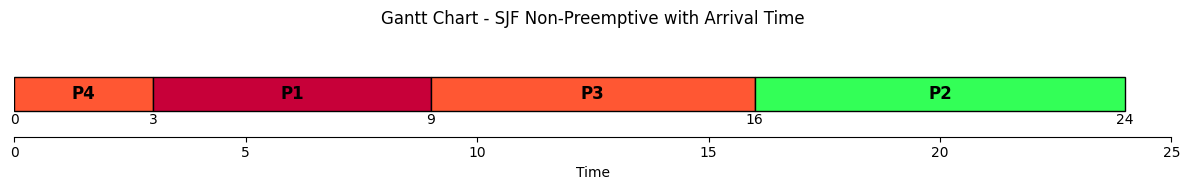

In [25]:
import matplotlib.pyplot as plt

# ------------------------------------------------------- SJF Function ---------------------------------------------------------
def sjf_non_preemptive_with_arrival(processes):
    # ترتيب العمليات حسب وقت الوصول فقط في البداية
    original_processes = processes.copy()  # الاحتفاظ بالترتيب الأصلي للعرض لاحقًا
    processes.sort(key=lambda x: x[1]) # ترتيب العمليات حسب وقت الوصول
    n = len(processes)
    waiting_time = [0] * n        #Waiting_time = [0,0,0,0]
    turnaround_time = [0] * n     #Turnaround_time = [0,0,0,0]
    gantt_chart = []
    current_time = 0
    completed = 0
    ready_queue = []
    process_index = 0
    final_order = []  # قائمة لترتيب العمليات النهائي

    # معالجة كل عملية بناءً على وقت الوصول ووقت التنفيذ
    while completed < n:
        # إضافة العمليات التي وصلت إلى قائمة الانتظار
        while process_index < n and processes[process_index][1] <= current_time:
            ready_queue.append(processes[process_index])
            process_index += 1


        # إذا كانت قائمة الانتظار فارغة، تقدم الزمن إلى أقرب عملية قادمة
        if not ready_queue:
            current_time = processes[process_index][1]
            continue


        # اختيار أقصر عملية في قائمة الانتظار
        ready_queue.sort(key=lambda x: x[2])      # Sort processes in the ready queue based on Shortest Burst time
        current_process = ready_queue.pop(0)      # pop the first process (previously sorted) from the ready Qeueue to start executing
        name, arrival, burst = current_process    # Split (current_process) Into three Variables (name, arrival, burst).


        # حساب الأوقات
        start_time = current_time
        end_time = current_time + burst
        waiting_time[completed] = start_time - arrival
        turnaround_time[completed] = waiting_time[completed] + burst
        gantt_chart.append((name, start_time, end_time))
        final_order.append(current_process)
        current_time = end_time
        completed += 1

    # حساب المتوسطات
    avg_wtime = sum(waiting_time) / n
    avg_ttime = sum(turnaround_time) / n

    # طباعة الجدول بالترتيب النهائي بعد التنفيذ
    print("\nProcess Table:")
    print(f"{'Process':<10}{'Arrival Time':<15}{'Burst Time':<15}{'Waiting Time':<15}{'Turnaround Time':<15}")
    for i, process in enumerate(final_order):
        name, arrival, burst = process
        print(f"{name:<10}{arrival:<15}{burst:<15}{waiting_time[i]:<15}{turnaround_time[i]:<15}")
    print(f"\nAverage Waiting Time: {avg_wtime:.2f}")
    print(f"Average Turnaround Time: {avg_ttime:.2f}")

    # Gantt Chart
    fig, ax = plt.subplots(figsize=(12, 2))

    for p in gantt_chart:
        name, start, end = p
        ax.barh(y=0, width=end - start, left=start, height=0.8, align='center', color='skyblue', edgecolor='black')
        ax.text((start + end) / 2, 0, name, ha='center', va='center', fontsize=12, fontweight='bold')

    # رسم الأوقات (على محور x أسفل كل حد)
    for p in gantt_chart:
        name, start, end = p
        ax.text(start, -0.6, str(start), ha='center', va='center', fontsize=10)
    # عرض نهاية آخر عملية
    ax.text(gantt_chart[-1][2], -0.6, str(gantt_chart[-1][2]), ha='center', va='center', fontsize=10)

    # تنسيقات
    ax.set_yticks([])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, gantt_chart[-1][2] + 1)
    ax.set_xlabel("Time")
    ax.set_title("Gantt Chart - SJF Non-Preemptive with Arrival Time", pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------- استقبال المدخلات ---------------------------------------------------------

n = int(input("Enter the number of processes: "))
processes = []

use_arrival_time = input("Use arrival times? (yes/no): ").strip().lower()

for i in range(n):
    if use_arrival_time == "yes":
        at = int(input(f"Enter Arrival Time for P{i+1}: "))
    else:
        at = 0
    bt = int(input(f"Enter Burst Time for P{i+1}: "))
    processes.append([f'P{i+1}', at, bt])

# استدعاء الفنكشن
sjf_non_preemptive_with_arrival(processes)
